In [2]:
source("/Users/wyx/Desktop/dissertation/wholecode.R")

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Warning message:
“package ‘rms’ was built under R version 4.3.3”
Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Warning message in .recacheSubclasses(def@className, def, env):
“undefined subclass "ndiMatrix" of class "replValueSp"; definition not updated”

Attaching package: ‘DescTools’


The following objects are masked from ‘package:Hmisc’:

    %nin%, Label, Mean, Quantile




## 1、Testing Single Parameter Beta Change

### 1) Age

In [26]:
# 定义 generate_gradual_shifted_data 函数
generate_covariate_shifted_data_age_1 <- function(seed) {
  set.seed(seed)
  data <- generate_covariate_shifted_data_age(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean_start = 64.6,
    age_mean_end = 62.5,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob = 0.107,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age = 0.0285181, 
    beta_cps = 1.086517,
    beta_sex = 0.2196434,
    beta_cpd = 0.1886564,
    beta_pcs = 1.118599
  )
  return(data)
}

In [27]:
# 初始化结果数据框
total_results_covariate_shift_age_1 <- data.frame()

# 运行实验
set.seed(123)
num_simulations <- 200


results <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))
  
for (i in 1:num_simulations) {
    set.seed(i)
    
    data_train <- generate_covariate_shifted_data_age_1(i)
    
    # 训练模型
    model <- train_model(data_train)
      
    # 计算性能指标
    metrics <- calculate_performance_metrics(model)
    
    results[i, ] <- unlist(metrics)
}
  
# 计算中位数和四分位数性能指标
median_metrics <- apply(results, 2, median)
quantile_metrics_25 <- apply(results, 2, quantile, probs = 0.25)
quantile_metrics_75 <- apply(results, 2, quantile, probs = 0.75)
  
    
# 格式化结果并保留小数点后7位
formatted_metrics <- data.frame(
    auc = paste0(format(median_metrics['auc'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['auc'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['auc'], digits = 7, nsmall = 7), ")"),
    o_e = paste0(format(median_metrics['o_e'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['o_e'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['o_e'], digits = 7, nsmall = 7), ")"),
    c_slope = paste0(format(median_metrics['c_slope'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['c_slope'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['c_slope'], digits = 7, nsmall = 7), ")"),
    brier_score = paste0(format(median_metrics['brier_score'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['brier_score'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['brier_score'], digits = 7, nsmall = 7), ")")
)
  
total_results_covariate_shift_age_1 <- rbind(total_results_covariate_shift_age_1, formatted_metrics)

  
total_results_covariate_shift_age_1



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

auc,o_e,c_slope,brier_score
<chr>,<chr>,<chr>,<chr>
"0.7254799 (0.7251417, 0.7258056)","0.9816753 (0.9668818, 0.9988567)","1.0593689 (1.0387452, 1.0853157)","0.1431078 (0.1430507, 0.1432092)"


In [28]:
data_train <- generate_covariate_shifted_data_age_1(1)
mean(data_train$age)

[1] 65.37594

In [29]:
# 假设你有一个函数 train_model 用于拟合模型，并返回模型对象
train_model <- function(data) {
  model <- glm(mortality ~ age + sex + chronic_pulmonary_disease + previous_cardiac_surgery + critical_preoperative_state, 
               data = data, family = binomial)
  return(model)
}

# 统计量列表
results <- data.frame()

for (seed in 1:200) {
  data_non_shifted <- generate_covariate_shifted_data_age_1(seed)
  
  # 计算统计量
  stats <- data.frame(
    mean_age = mean(data_non_shifted$age),
    min_age = min(data_non_shifted$age),
    max_age = max(data_non_shifted$age),
    sd_age = sd(data_non_shifted$age),
    sex_proportions_male = prop.table(table(data_non_shifted$sex))["0"],
    sex_proportions_female = prop.table(table(data_non_shifted$sex))["1"],
    cpd_proportions_0 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[1],
    cpd_proportions_1 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[2],
    pcs_proportions_0 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[1],
    pcs_proportions_1 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[2],
    cps_proportions_0 = prop.table(table(data_non_shifted$critical_preoperative_state))[1],
    cps_proportions_1 = prop.table(table(data_non_shifted$critical_preoperative_state))[2],
    mortality_proportions_0 = prop.table(table(data_non_shifted$mortality))[1],
    mortality_proportions_1 = prop.table(table(data_non_shifted$mortality))[2]
  )
  
  # 拟合模型并提取系数
  model <- train_model(data_non_shifted)
  coefs <- coef(model)
  
  # 将系数添加到统计量中
  stats <- cbind(stats, t(coefs[c("age", "sex", "chronic_pulmonary_disease", "previous_cardiac_surgery", "critical_preoperative_state")]))
  
  # 将每次循环的统计量结果合并到结果列表中
  results <- rbind(results, stats)
}

# 计算每个统计量的中位数
medians <- apply(results, 2, median)
print(medians)


                   mean_age                     min_age 
                65.53454574                 29.65133647 
                    max_age                      sd_age 
                95.00000000                 13.30622996 
       sex_proportions_male      sex_proportions_female 
                 0.69121016                  0.30878984 
          cpd_proportions_0           cpd_proportions_1 
                 0.89335555                  0.10664445 
          pcs_proportions_0           pcs_proportions_1 
                 0.71797542                  0.28202458 
          cps_proportions_0           cps_proportions_1 
                 0.75885232                  0.24114768 
    mortality_proportions_0     mortality_proportions_1 
                 0.79618829                  0.20381171 
                        age                         sex 
                 0.02808279                  0.21857029 
  chronic_pulmonary_disease    previous_cardiac_surgery 
                 0.19096936    

### 2) cpd

In [30]:
# 定义 generate_gradual_shifted_data 函数
generate_covariate_shifted_data_cpd_1 <- function(seed) {
  set.seed(seed)
  data <- generate_covariate_shifted_data_cpd(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean = 64.6,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob_start = 0.107,
    cpd_prob_end = 0.039,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age = 0.0285181, 
    beta_cps = 1.086517,
    beta_sex = 0.2196434,
    beta_cpd = 0.1886564,
    beta_pcs = 1.118599
  )
  return(data)
}

In [10]:
# 初始化结果数据框
total_results_covariate_shift_cpd_1 <- data.frame()

# 运行实验
set.seed(123)
num_simulations <- 200


results <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))
  
for (i in 1:num_simulations) {
    set.seed(i)
    
    data_train <- generate_covariate_shifted_data_cpd_1(i)
    
    # 训练模型
    model <- train_model(data_train)
      
    # 计算性能指标
    metrics <- calculate_performance_metrics(model)
    
    results[i, ] <- unlist(metrics)
}
  
# 计算中位数和四分位数性能指标
median_metrics <- apply(results, 2, median)
quantile_metrics_25 <- apply(results, 2, quantile, probs = 0.25)
quantile_metrics_75 <- apply(results, 2, quantile, probs = 0.75)
  
    
# 格式化结果并保留小数点后7位
formatted_metrics_2 <- data.frame(
    auc = paste0(format(median_metrics['auc'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['auc'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['auc'], digits = 7, nsmall = 7), ")"),
    o_e = paste0(format(median_metrics['o_e'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['o_e'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['o_e'], digits = 7, nsmall = 7), ")"),
    c_slope = paste0(format(median_metrics['c_slope'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['c_slope'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['c_slope'], digits = 7, nsmall = 7), ")"),
    brier_score = paste0(format(median_metrics['brier_score'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['brier_score'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['brier_score'], digits = 7, nsmall = 7), ")")
)
  
total_results_covariate_shift_cpd_1 <- rbind(total_results_covariate_shift_cpd_1, formatted_metrics_2)

  
total_results_covariate_shift_cpd_1



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

auc,o_e,c_slope,brier_score
<chr>,<chr>,<chr>,<chr>
"0.7254469 (0.7250893, 0.7257267)","0.9952762 (0.9779201, 1.0091338)","1.0596139 (1.0408304, 1.0844862)","0.1431381 (0.1430582, 0.1432080)"


In [31]:
# 假设你有一个函数 train_model 用于拟合模型，并返回模型对象
train_model <- function(data) {
  model <- glm(mortality ~ age + sex + chronic_pulmonary_disease + previous_cardiac_surgery + critical_preoperative_state, 
               data = data, family = binomial)
  return(model)
}

# 统计量列表
results <- data.frame()

for (seed in 1:200) {
  data_non_shifted <- generate_covariate_shifted_data_cpd_1(seed)
  
  # 计算统计量
  stats <- data.frame(
    mean_age = mean(data_non_shifted$age),
    min_age = min(data_non_shifted$age),
    max_age = max(data_non_shifted$age),
    sd_age = sd(data_non_shifted$age),
    sex_proportions_male = prop.table(table(data_non_shifted$sex))["0"],
    sex_proportions_female = prop.table(table(data_non_shifted$sex))["1"],
    cpd_proportions_0 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[1],
    cpd_proportions_1 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[2],
    pcs_proportions_0 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[1],
    pcs_proportions_1 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[2],
    cps_proportions_0 = prop.table(table(data_non_shifted$critical_preoperative_state))[1],
    cps_proportions_1 = prop.table(table(data_non_shifted$critical_preoperative_state))[2],
    mortality_proportions_0 = prop.table(table(data_non_shifted$mortality))[1],
    mortality_proportions_1 = prop.table(table(data_non_shifted$mortality))[2]
  )
  
  # 拟合模型并提取系数
  model <- train_model(data_non_shifted)
  coefs <- coef(model)
  
  # 将系数添加到统计量中
  stats <- cbind(stats, t(coefs[c("age", "sex", "chronic_pulmonary_disease", "previous_cardiac_surgery", "critical_preoperative_state")]))
  
  # 将每次循环的统计量结果合并到结果列表中
  results <- rbind(results, stats)
}

# 计算每个统计量的中位数
medians <- apply(results, 2, median)
print(medians)


                   mean_age                     min_age 
                66.47381356                 30.82831626 
                    max_age                      sd_age 
                95.00000000                 13.10315351 
       sex_proportions_male      sex_proportions_female 
                 0.69100187                  0.30899813 
          cpd_proportions_0           cpd_proportions_1 
                 0.92725474                  0.07274526 
          pcs_proportions_0           pcs_proportions_1 
                 0.71771506                  0.28228494 
          cps_proportions_0           cps_proportions_1 
                 0.75895647                  0.24104353 
    mortality_proportions_0     mortality_proportions_1 
                 0.79592793                  0.20407207 
                        age                         sex 
                 0.02827216                  0.21672568 
  chronic_pulmonary_disease    previous_cardiac_surgery 
                 0.17998827    

### 3) Both

In [32]:
# 定义 generate_gradual_shifted_data 函数
generate_covariate_shifted_data_both_1 <- function(seed) {
  set.seed(seed)
  data <- generate_covariate_shifted_data_both(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean_start = 64.6,
    age_mean_end = 62.5,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob_start = 0.107,
    cpd_prob_end = 0.039,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age = 0.0285181, 
    beta_cps = 1.086517,
    beta_sex = 0.2196434,
    beta_cpd = 0.1886564,
    beta_pcs = 1.118599
  )
  return(data)
}

In [14]:
# 初始化结果数据框
total_results_covariate_shifted_data_both_1 <- data.frame()

# 运行实验
set.seed(123)
num_simulations <- 200


results <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))
  
for (i in 1:num_simulations) {
    set.seed(i)
    
    data_train <- generate_covariate_shifted_data_both_1(i)
    
    # 训练模型
    model <- train_model(data_train)
      
    # 计算性能指标
    metrics <- calculate_performance_metrics(model)
    
    results[i, ] <- unlist(metrics)
}
  
# 计算中位数和四分位数性能指标
median_metrics <- apply(results, 2, median)
quantile_metrics_25 <- apply(results, 2, quantile, probs = 0.25)
quantile_metrics_75 <- apply(results, 2, quantile, probs = 0.75)
  
    
# 格式化结果并保留小数点后7位
formatted_metrics_3 <- data.frame(
    auc = paste0(format(median_metrics['auc'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['auc'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['auc'], digits = 7, nsmall = 7), ")"),
    o_e = paste0(format(median_metrics['o_e'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['o_e'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['o_e'], digits = 7, nsmall = 7), ")"),
    c_slope = paste0(format(median_metrics['c_slope'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['c_slope'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['c_slope'], digits = 7, nsmall = 7), ")"),
    brier_score = paste0(format(median_metrics['brier_score'], digits = 7, nsmall = 7), " (", format(quantile_metrics_25['brier_score'], digits = 7, nsmall = 7), ", ", format(quantile_metrics_75['brier_score'], digits = 7, nsmall = 7), ")")
)

total_results_covariate_shifted_data_both_1 <- rbind(total_results_covariate_shifted_data_both_1, formatted_metrics_3)

  
total_results_covariate_shifted_data_both_1



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

auc,o_e,c_slope,brier_score
<chr>,<chr>,<chr>,<chr>
"0.7254816 (0.7251949, 0.7257314)","0.9765517 (0.9633454, 0.9939232)","1.0577411 (1.0394207, 1.0817728)","0.1431066 (0.1430433, 0.1431988)"


In [33]:
# 假设你有一个函数 train_model 用于拟合模型，并返回模型对象
train_model <- function(data) {
  model <- glm(mortality ~ age + sex + chronic_pulmonary_disease + previous_cardiac_surgery + critical_preoperative_state, 
               data = data, family = binomial)
  return(model)
}

# 统计量列表
results <- data.frame()

for (seed in 1:200) {
  data_non_shifted <- generate_covariate_shifted_data_both_1(seed)
  
  # 计算统计量
  stats <- data.frame(
    mean_age = mean(data_non_shifted$age),
    min_age = min(data_non_shifted$age),
    max_age = max(data_non_shifted$age),
    sd_age = sd(data_non_shifted$age),
    sex_proportions_male = prop.table(table(data_non_shifted$sex))["0"],
    sex_proportions_female = prop.table(table(data_non_shifted$sex))["1"],
    cpd_proportions_0 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[1],
    cpd_proportions_1 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[2],
    pcs_proportions_0 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[1],
    pcs_proportions_1 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[2],
    cps_proportions_0 = prop.table(table(data_non_shifted$critical_preoperative_state))[1],
    cps_proportions_1 = prop.table(table(data_non_shifted$critical_preoperative_state))[2],
    mortality_proportions_0 = prop.table(table(data_non_shifted$mortality))[1],
    mortality_proportions_1 = prop.table(table(data_non_shifted$mortality))[2]
  )
  
  # 拟合模型并提取系数
  model <- train_model(data_non_shifted)
  coefs <- coef(model)
  
  # 将系数添加到统计量中
  stats <- cbind(stats, t(coefs[c("age", "sex", "chronic_pulmonary_disease", "previous_cardiac_surgery", "critical_preoperative_state")]))
  
  # 将每次循环的统计量结果合并到结果列表中
  results <- rbind(results, stats)
}

# 计算每个统计量的中位数
medians <- apply(results, 2, median)
print(medians)


                   mean_age                     min_age 
                65.53580165                 29.71630984 
                    max_age                      sd_age 
                95.00000000                 13.30335812 
       sex_proportions_male      sex_proportions_female 
                 0.69079358                  0.30920642 
          cpd_proportions_0           cpd_proportions_1 
                 0.92699438                  0.07300562 
          pcs_proportions_0           pcs_proportions_1 
                 0.71781920                  0.28218080 
          cps_proportions_0           cps_proportions_1 
                 0.75880025                  0.24119975 
    mortality_proportions_0     mortality_proportions_1 
                 0.79598000                  0.20402000 
                        age                         sex 
                 0.02811055                  0.21872826 
  chronic_pulmonary_disease    previous_cardiac_surgery 
                 0.18312099    

## 2、Testing Multiple Parameters Beta Change

### 1) Age

In [3]:
generate_covariate_shifted_data_age_2 <- function(seed, age_mean_start, age_mean_end) {
  set.seed(seed)
  data <- generate_covariate_shifted_data_age(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean_start = age_mean_start,
    age_mean_end = age_mean_end,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob = 0.107,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age = 0.0285181,
    beta_sex = 0.2196434,
    beta_cpd = 0.1886564,
    beta_pcs = 1.118599,
    beta_cps = 1.086517
  )
  return(data)
}

In [4]:
experiments_cs_age <- list(
  list(name = "age mean: 64.6000,64.6000", age_mean_start = 64.6, age_mean_end = 64.6),
  list(name = "age mean: 64.6000,63.8923", age_mean_start = 64.6, age_mean_end = 63.8923),
  list(name = "age mean: 64.6000,63.1923", age_mean_start = 64.6, age_mean_end = 63.1923),
  list(name = "age mean: 64.6000,62.5000", age_mean_start = 64.6, age_mean_end = 62.5),
  list(name = "age mean: 64.6000,61.8153", age_mean_start = 64.6, age_mean_end = 61.8153),
  list(name = "age mean: 64.6000,61.1381", age_mean_start = 64.6, age_mean_end = 61.1381),
  list(name = "age mean: 64.6000,60.4683", age_mean_start = 64.6, age_mean_end = 60.4683),
  list(name = "age mean: 64.6000,59.8058", age_mean_start = 64.6, age_mean_end = 59.8058),
  list(name = "age mean: 64.6000,59.1506", age_mean_start = 64.6, age_mean_end = 59.1506),
  list(name = "age mean: 64.6000,58.5026", age_mean_start = 64.6, age_mean_end = 58.5026)
)

In [5]:
total_results_covariate_shifted_data_age_2 <- data.frame()

# 运行实验
set.seed(123)
num_simulations <- 200

for (exp in experiments_cs_age) {
  results <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))
  
  for (i in 1:num_simulations) {
    set.seed(i)
    
    # 重定向输出
    sink(tempfile())
      
    data_train <- generate_covariate_shifted_data_age_2(i, exp$age_mean_start, exp$age_mean_end)
    
    # 训练模型
    model <- train_model(data_train)
      
    # 计算性能指标
    metrics <- calculate_performance_metrics(model)
    
    results[i, ] <- unlist(metrics)
    
    sink()  # 结束输出重定向
  }
  
  # 计算中位数、25%和75%的性能指标
  median_metrics_shifted_age_2 <- apply(results, 2, median)
  quantile_25_metrics_shifted_age_2 <- apply(results, 2, quantile, probs = 0.25)
  quantile_75_metrics_shifted_age_2 <- apply(results, 2, quantile, probs = 0.75)
  

  # 将实验名称和结果添加到总的结果数据框
  metrics_summary <- data.frame(
    experiment = exp$name,
    auc_median = median_metrics_shifted_age_2['auc'],
    auc_25 = quantile_25_metrics_shifted_age_2['auc'],
    auc_75 = quantile_75_metrics_shifted_age_2['auc'],
    o_e_median = median_metrics_shifted_age_2['o_e'],
    o_e_25 = quantile_25_metrics_shifted_age_2['o_e'],
    o_e_75 = quantile_75_metrics_shifted_age_2['o_e'],
    c_slope_median = median_metrics_shifted_age_2['c_slope'],
    c_slope_25 = quantile_25_metrics_shifted_age_2['c_slope'],
    c_slope_75 = quantile_75_metrics_shifted_age_2['c_slope'],
    brier_score_median = median_metrics_shifted_age_2['brier_score'],
    brier_score_25 = quantile_25_metrics_shifted_age_2['brier_score'],
    brier_score_75 = quantile_75_metrics_shifted_age_2['brier_score']
  )
  
  total_results_covariate_shifted_data_age_2 <- rbind(total_results_covariate_shifted_data_age_2, metrics_summary)
}

# 打印最终结果
total_results_covariate_shifted_data_age_2


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

,experiment,auc_median,auc_25,auc_75,o_e_median,o_e_25,o_e_75,c_slope_median,c_slope_25,c_slope_75,brier_score_median,brier_score_25,brier_score_75
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
auc,"age mean: 64.6000,64.6000",0.7255060,0.7251684,0.7258128,0.9966657,0.9828352,1.0145479,1.060477,1.042498,1.088602,0.1431278,0.1430508,0.1432152
auc1,"age mean: 64.6000,63.8923",0.7254888,0.7251421,0.7258185,0.9913762,0.9762745,1.0090320,1.058687,1.040988,1.084769,0.1431155,0.1430514,0.1432120
auc2,"age mean: 64.6000,63.1923",0.7254909,0.7251729,0.7258099,0.9878837,0.9731066,1.0029924,1.060744,1.040076,1.086074,0.1431158,0.1430569,0.1431968
auc3,"age mean: 64.6000,62.5000",0.7254799,0.7251417,0.7258056,0.9816753,0.9668818,0.9988567,1.059369,1.038745,1.085316,0.1431078,0.1430507,0.1432092
auc4,"age mean: 64.6000,61.8153",0.7254768,0.7251184,0.7257938,0.9759669,0.9608355,0.9919204,1.060595,1.038927,1.084171,0.1431256,0.1430530,0.1432195
auc5,"age mean: 64.6000,61.1381",0.7255081,0.7251521,0.7258073,0.9706134,0.9558116,0.9865125,1.063010,1.043210,1.085078,0.1431389,0.1430661,0.1432343
auc6,"age mean: 64.6000,60.4683",0.7255297,0.7251708,0.7257522,0.9658539,0.9503112,0.9803155,1.064694,1.044839,1.085317,0.1431491,0.1430766,0.1432353
auc7,"age mean: 64.6000,59.8058",0.7254730,0.7251395,0.7257183,0.9596873,0.9448924,0.9733582,1.067011,1.045762,1.088186,0.1431739,0.1430994,0.1432628
auc8,"age mean: 64.6000,59.1506",0.7254713,0.7251134,0.7257174,0.9550690,0.9399665,0.9687421,1.067200,1.046166,1.089957,0.1431963,0.1431057,0.1432829


In [6]:
total_results_covariate_shifted_data_age_2

,experiment,auc_median,auc_25,auc_75,o_e_median,o_e_25,o_e_75,c_slope_median,c_slope_25,c_slope_75,brier_score_median,brier_score_25,brier_score_75
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
auc,"age mean: 64.6000,64.6000",0.7255060,0.7251684,0.7258128,0.9966657,0.9828352,1.0145479,1.060477,1.042498,1.088602,0.1431278,0.1430508,0.1432152
auc1,"age mean: 64.6000,63.8923",0.7254888,0.7251421,0.7258185,0.9913762,0.9762745,1.0090320,1.058687,1.040988,1.084769,0.1431155,0.1430514,0.1432120
auc2,"age mean: 64.6000,63.1923",0.7254909,0.7251729,0.7258099,0.9878837,0.9731066,1.0029924,1.060744,1.040076,1.086074,0.1431158,0.1430569,0.1431968
auc3,"age mean: 64.6000,62.5000",0.7254799,0.7251417,0.7258056,0.9816753,0.9668818,0.9988567,1.059369,1.038745,1.085316,0.1431078,0.1430507,0.1432092
auc4,"age mean: 64.6000,61.8153",0.7254768,0.7251184,0.7257938,0.9759669,0.9608355,0.9919204,1.060595,1.038927,1.084171,0.1431256,0.1430530,0.1432195
auc5,"age mean: 64.6000,61.1381",0.7255081,0.7251521,0.7258073,0.9706134,0.9558116,0.9865125,1.063010,1.043210,1.085078,0.1431389,0.1430661,0.1432343
auc6,"age mean: 64.6000,60.4683",0.7255297,0.7251708,0.7257522,0.9658539,0.9503112,0.9803155,1.064694,1.044839,1.085317,0.1431491,0.1430766,0.1432353
auc7,"age mean: 64.6000,59.8058",0.7254730,0.7251395,0.7257183,0.9596873,0.9448924,0.9733582,1.067011,1.045762,1.088186,0.1431739,0.1430994,0.1432628
auc8,"age mean: 64.6000,59.1506",0.7254713,0.7251134,0.7257174,0.9550690,0.9399665,0.9687421,1.067200,1.046166,1.089957,0.1431963,0.1431057,0.1432829


### 2) cpd

In [7]:
# 定义 generate_gradual_shifted_data 函数
generate_covariate_shifted_data_cpd_2 <- function(seed, cpd_prob_start, cpd_prob_end) {
  set.seed(seed)
  data <- generate_covariate_shifted_data_cpd(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean = 64.6,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob_start = cpd_prob_start,
    cpd_prob_end = cpd_prob_end,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age = 0.0285181, 
    beta_cps = 1.086517,
    beta_sex = 0.2196434,
    beta_cpd = 0.1886564,
    beta_pcs = 1.118599
  )
  return(data)
}

In [8]:
experiments_cs_cpd <- list(
  list(name = "cpd prop:0.1070,0.1070", cpd_prob_start = 0.107, cpd_prob_end = 0.107),
  list(name = "cpd prop:0.1070,0.0764", cpd_prob_start = 0.107, cpd_prob_end = 0.0764),
  list(name = "cpd prop:0.1070,0.0546", cpd_prob_start = 0.107, cpd_prob_end = 0.0546),
  list(name = "cpd prop:0.1070,0.0390", cpd_prob_start = 0.107, cpd_prob_end = 0.039),
  list(name = "cpd prop:0.1070,0.0279", cpd_prob_start = 0.107, cpd_prob_end = 0.0279),
  list(name = "cpd prop:0.1070,0.0199", cpd_prob_start = 0.107, cpd_prob_end = 0.0199),
  list(name = "cpd prop:0.1070,0.0142", cpd_prob_start = 0.107, cpd_prob_end = 0.0142),
  list(name = "cpd prop:0.1070,0.0102", cpd_prob_start = 0.107, cpd_prob_end = 0.0102),
  list(name = "cpd prop:0.1070,0.0073", cpd_prob_start = 0.107, cpd_prob_end = 0.0073),
  list(name = "cpd prop:0.1070,0.0052", cpd_prob_start = 0.107, cpd_prob_end = 0.0052)
)

In [9]:
total_results_covariate_shifted_data_cpd_2 <- data.frame()

# 运行实验
set.seed(123)
num_simulations <- 200

for (exp in experiments_cs_cpd) {
  results <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))
  
  for (i in 1:num_simulations) {
    set.seed(i)
    
    # 重定向输出
    sink(tempfile())
      
    data_train <- generate_covariate_shifted_data_cpd_2(i, exp$cpd_prob_start, exp$cpd_prob_end)
    
    # 训练模型
    model <- train_model(data_train)
      
    # 计算性能指标
    metrics <- calculate_performance_metrics(model)
    
    results[i, ] <- unlist(metrics)
    
    sink()  # 结束输出重定向
  }
  
  # 计算中位数、25%和75%的性能指标
  median_metrics_shifted_age_2 <- apply(results, 2, median)
  quantile_25_metrics_shifted_age_2 <- apply(results, 2, quantile, probs = 0.25)
  quantile_75_metrics_shifted_age_2 <- apply(results, 2, quantile, probs = 0.75)
  

  # 将实验名称和结果-添加到总的结果数据框
  metrics_summary_cpd_2 <- data.frame(
    experiment = exp$name,
    auc_median = median_metrics_shifted_age_2['auc'],
    auc_25 = quantile_25_metrics_shifted_age_2['auc'],
    auc_75 = quantile_75_metrics_shifted_age_2['auc'],
    o_e_median = median_metrics_shifted_age_2['o_e'],
    o_e_25 = quantile_25_metrics_shifted_age_2['o_e'],
    o_e_75 = quantile_75_metrics_shifted_age_2['o_e'],
    c_slope_median = median_metrics_shifted_age_2['c_slope'],
    c_slope_25 = quantile_25_metrics_shifted_age_2['c_slope'],
    c_slope_75 = quantile_75_metrics_shifted_age_2['c_slope'],
    brier_score_median = median_metrics_shifted_age_2['brier_score'],
    brier_score_25 = quantile_25_metrics_shifted_age_2['brier_score'],
    brier_score_75 = quantile_75_metrics_shifted_age_2['brier_score']
  )
  
  total_results_covariate_shifted_data_cpd_2 <- rbind(total_results_covariate_shifted_data_cpd_2, metrics_summary_cpd_2)
}

# 打印最终结果
total_results_covariate_shifted_data_cpd_2


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

,experiment,auc_median,auc_25,auc_75,o_e_median,o_e_25,o_e_75,c_slope_median,c_slope_25,c_slope_75,brier_score_median,brier_score_25,brier_score_75
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
auc,"cpd prop:0.1070,0.1070",0.7255060,0.7251684,0.7258128,0.9966657,0.9828352,1.014548,1.060477,1.042498,1.088602,0.1431278,0.1430508,0.1432152
auc1,"cpd prop:0.1070,0.0764",0.7254981,0.7251689,0.7257480,0.9988428,0.9803012,1.015208,1.060089,1.039270,1.082505,0.1431232,0.1430515,0.1432097
auc2,"cpd prop:0.1070,0.0546",0.7254723,0.7250843,0.7257735,0.9977270,0.9804896,1.012346,1.058901,1.036777,1.082837,0.1431325,0.1430513,0.1432180
auc3,"cpd prop:0.1070,0.0390",0.7254469,0.7250893,0.7257267,0.9952762,0.9779201,1.009134,1.059614,1.040830,1.084486,0.1431381,0.1430582,0.1432080
auc4,"cpd prop:0.1070,0.0279",0.7254163,0.7250780,0.7257621,0.9920568,0.9776229,1.007978,1.059174,1.037500,1.088258,0.1431414,0.1430391,0.1432225
auc5,"cpd prop:0.1070,0.0199",0.7254238,0.7250221,0.7257274,0.9941328,0.9783776,1.010494,1.058025,1.037049,1.083807,0.1431465,0.1430435,0.1432250
auc6,"cpd prop:0.1070,0.0142",0.7254049,0.7250952,0.7257169,0.9931113,0.9773453,1.010043,1.059670,1.037535,1.083050,0.1431259,0.1430491,0.1432144
auc7,"cpd prop:0.1070,0.0102",0.7254472,0.7251392,0.7257737,0.9927970,0.9783073,1.009451,1.059301,1.040152,1.083854,0.1431327,0.1430438,0.1432163
auc8,"cpd prop:0.1070,0.0073",0.7254617,0.7251371,0.7257334,0.9926878,0.9768875,1.009097,1.061191,1.040812,1.083131,0.1431300,0.1430448,0.1432141


In [21]:
total_results_covariate_shifted_data_cpd_2

,experiment,auc_median,auc_25,auc_75,o_e_median,o_e_25,o_e_75,c_slope_median,c_slope_25,c_slope_75,brier_score_median,brier_score_25,brier_score_75
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
auc,"cpd prop:0.1070,0.1070",0.7255060,0.7251684,0.7258128,0.9966657,0.9828352,1.014548,1.060477,1.042498,1.088602,0.1431278,0.1430508,0.1432152
auc1,"cpd prop:0.1070,0.0764",0.7254981,0.7251689,0.7257480,0.9988428,0.9803012,1.015208,1.060089,1.039270,1.082505,0.1431232,0.1430515,0.1432097
auc2,"cpd prop:0.1070,0.0546",0.7254723,0.7250843,0.7257735,0.9977270,0.9804896,1.012346,1.058901,1.036777,1.082837,0.1431325,0.1430513,0.1432180
auc3,"cpd prop:0.1070,0.0390",0.7254469,0.7250893,0.7257267,0.9952762,0.9779201,1.009134,1.059614,1.040830,1.084486,0.1431381,0.1430582,0.1432080
auc4,"cpd prop:0.1070,0.0279",0.7254163,0.7250780,0.7257621,0.9920568,0.9776229,1.007978,1.059174,1.037500,1.088258,0.1431414,0.1430391,0.1432225
auc5,"cpd prop:0.1070,0.0199",0.7254238,0.7250221,0.7257274,0.9941328,0.9783776,1.010494,1.058025,1.037049,1.083807,0.1431465,0.1430435,0.1432250
auc6,"cpd prop:0.1070,0.0142",0.7254049,0.7250952,0.7257169,0.9931113,0.9773453,1.010043,1.059670,1.037535,1.083050,0.1431259,0.1430491,0.1432144
auc7,"cpd prop:0.1070,0.0102",0.7254472,0.7251392,0.7257737,0.9927970,0.9783073,1.009451,1.059301,1.040152,1.083854,0.1431327,0.1430438,0.1432163
auc8,"cpd prop:0.1070,0.0073",0.7254617,0.7251371,0.7257334,0.9926878,0.9768875,1.009097,1.061191,1.040812,1.083131,0.1431300,0.1430448,0.1432141


### 3） Both

In [10]:
# 定义 generate_gradual_shifted_data 函数
generate_covariate_shifted_data_both_2 <- function(seed,age_mean_start, age_mean_end, cpd_prob_start, cpd_prob_end) {
  set.seed(seed)
  data <- generate_covariate_shifted_data_both(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean_start = age_mean_start,
    age_mean_end = age_mean_end,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob_start = cpd_prob_start,
    cpd_prob_end = cpd_prob_end,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age = 0.0285181, 
    beta_cps = 1.086517,
    beta_sex = 0.2196434,
    beta_cpd = 0.1886564,
    beta_pcs = 1.118599
  )
  return(data)
}

In [11]:
experiments_cs_both <- list(
  list(name = "age mean: 64.6000,64.6000; cpd prop:0.1070,0.1070", age_mean_start = 64.6, age_mean_end = 64.6, cpd_prob_start = 0.107, cpd_prob_end = 0.107),
  list(name = "age mean: 64.6000,63.8923; cpd prop:0.1070,0.0764", age_mean_start = 64.6, age_mean_end = 63.8923, cpd_prob_start = 0.107, cpd_prob_end = 0.0764),
  list(name = "age mean: 64.6000,63.1923; cpd prop:0.1070,0.0546", age_mean_start = 64.6, age_mean_end = 63.1923, cpd_prob_start = 0.107, cpd_prob_end = 0.0546),
  list(name = "age mean: 64.6000,62.5000; cpd prop:0.1070,0.0390", age_mean_start = 64.6, age_mean_end = 62.5, cpd_prob_start = 0.107, cpd_prob_end = 0.039),
  list(name = "age mean: 64.6000,61.8153; cpd prop:0.1070,0.0279", age_mean_start = 64.6, age_mean_end = 61.8153, cpd_prob_start = 0.107, cpd_prob_end = 0.0279),
  list(name = "age mean: 64.6000,61.1381; cpd prop:0.1070,0.0199", age_mean_start = 64.6, age_mean_end = 61.1381, cpd_prob_start = 0.107, cpd_prob_end = 0.0199),
  list(name = "age mean: 64.6000,60.4683; cpd prop:0.1070,0.0142", age_mean_start = 64.6, age_mean_end = 60.4683, cpd_prob_start = 0.107, cpd_prob_end = 0.0142),
  list(name = "age mean: 64.6000,59.8058; cpd prop:0.1070,0.0102", age_mean_start = 64.6, age_mean_end = 59.8058, cpd_prob_start = 0.107, cpd_prob_end = 0.0102),
  list(name = "age mean: 64.6000,59.1506; cpd prop:0.1070,0.0073", age_mean_start = 64.6, age_mean_end = 59.1506, cpd_prob_start = 0.107, cpd_prob_end = 0.0073),
  list(name = "age mean: 64.6000,58.5026; cpd prop:0.1070,0.0052", age_mean_start = 64.6, age_mean_end = 58.5026, cpd_prob_start = 0.107, cpd_prob_end = 0.0052)
)


In [15]:
experiments_cs_both_2 <- list(
  list(name = "1", age_mean_start = 64.6, age_mean_end = 64.6, cpd_prob_start = 0.107, cpd_prob_end = 0.107),
  list(name = "2", age_mean_start = 64.6, age_mean_end = 63.8923, cpd_prob_start = 0.107, cpd_prob_end = 0.0764),
  list(name = "3", age_mean_start = 64.6, age_mean_end = 63.1923, cpd_prob_start = 0.107, cpd_prob_end = 0.0546),
  list(name = "4", age_mean_start = 64.6, age_mean_end = 62.5, cpd_prob_start = 0.107, cpd_prob_end = 0.039),
  list(name = "5", age_mean_start = 64.6, age_mean_end = 61.8153, cpd_prob_start = 0.107, cpd_prob_end = 0.0279),
  list(name = "6", age_mean_start = 64.6, age_mean_end = 61.1381, cpd_prob_start = 0.107, cpd_prob_end = 0.0199),
  list(name = "7", age_mean_start = 64.6, age_mean_end = 60.4683, cpd_prob_start = 0.107, cpd_prob_end = 0.0142),
  list(name = "8", age_mean_start = 64.6, age_mean_end = 59.8058, cpd_prob_start = 0.107, cpd_prob_end = 0.0102),
  list(name = "9", age_mean_start = 64.6, age_mean_end = 59.1506, cpd_prob_start = 0.107, cpd_prob_end = 0.0073),
  list(name = "10", age_mean_start = 64.6, age_mean_end = 58.5026, cpd_prob_start = 0.107, cpd_prob_end = 0.0052)
)

In [21]:
# 初始化结果数据框
total_results_covariate_shifted_data_both_2 <- data.frame()

# 运行实验
set.seed(123)
num_simulations <- 200

for (exp in experiments_cs_both_2) {
    results <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))
    for (i in 1:num_simulations) {
        set.seed(i)

        data_train <- generate_covariate_shifted_data_both_2(i, exp$age_mean_start, exp$age_mean_end, exp$cpd_prob_start, exp$cpd_prob_end)

        # 训练模型
        model <- train_model(data_train)

        # 计算性能指标
        metrics <- calculate_performance_metrics(model)

        results[i, ] <- unlist(metrics)
    }
  
    # 计算中位数和四分位数性能指标
    median_metrics_shifted_both_2 <- apply(results, 2, median)
    quantile_25_metrics_shifted_both_2 <- apply(results, 2, quantile, probs = 0.25)
    quantile_75_metrics_shifted_both_2 <- apply(results, 2, quantile, probs = 0.75)

    
    metrics_summary_both_2 <- data.frame(
        experiment = exp$name,
        auc_median = median_metrics_shifted_both_2['auc'],
        auc_25 = quantile_25_metrics_shifted_both_2['auc'],
        auc_75 = quantile_75_metrics_shifted_both_2['auc'],
        o_e_median = median_metrics_shifted_both_2['o_e'],
        o_e_25 = quantile_25_metrics_shifted_both_2['o_e'],
        o_e_75 = quantile_75_metrics_shifted_both_2['o_e'],
        c_slope_median = median_metrics_shifted_both_2['c_slope'],
        c_slope_25 = quantile_25_metrics_shifted_both_2['c_slope'],
        c_slope_75 = quantile_75_metrics_shifted_both_2['c_slope'],
        brier_score_median = median_metrics_shifted_both_2['brier_score'],
        brier_score_25 = quantile_25_metrics_shifted_both_2['brier_score'],
        brier_score_75 = quantile_75_metrics_shifted_both_2['brier_score']
    )
    
  
    total_results_covariate_shifted_data_both_2 <- rbind(total_results_covariate_shifted_data_both_2, metrics_summary_both_2)
}

total_results_covariate_shifted_data_both_2


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

,experiment,auc_median,auc_25,auc_75,o_e_median,o_e_25,o_e_75,c_slope_median,c_slope_25,c_slope_75,brier_score_median,brier_score_25,brier_score_75
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
auc,1,0.7255060,0.7251684,0.7258128,0.9966657,0.9828352,1.0145479,1.060477,1.042498,1.088602,0.1431278,0.1430508,0.1432152
auc1,2,0.7254465,0.7251349,0.7257893,0.9919307,0.9742459,1.0080672,1.062019,1.038172,1.086341,0.1431207,0.1430483,0.1432084
auc2,3,0.7254675,0.7251328,0.7257546,0.9839963,0.9706637,1.0002422,1.058916,1.038920,1.083434,0.1431162,0.1430400,0.1432033
auc3,4,0.7254816,0.7251949,0.7257314,0.9765517,0.9633454,0.9939232,1.057741,1.039421,1.081773,0.1431066,0.1430433,0.1431988
auc4,5,0.7255063,0.7251509,0.7257809,0.9708753,0.9567115,0.9859857,1.065103,1.042685,1.087624,0.1431274,0.1430610,0.1431969
auc5,6,0.7254118,0.7251275,0.7257475,0.9654693,0.9512406,0.9811195,1.063845,1.041982,1.084688,0.1431357,0.1430769,0.1432189
auc6,7,0.7254039,0.7251215,0.7257008,0.9589563,0.9470565,0.9730108,1.064428,1.043874,1.089658,0.1431478,0.1430827,0.1432335
auc7,8,0.7254290,0.7250374,0.7257068,0.9557033,0.9424723,0.9692256,1.065555,1.042454,1.090306,0.1431684,0.1430876,0.1432677
auc8,9,0.7253926,0.7250230,0.7256690,0.9481716,0.9363803,0.9637043,1.067650,1.045392,1.093534,0.1432139,0.1431121,0.1432911


In [19]:
total_results_covariate_shifted_data_both_2

,experiment,auc_median,auc_25,auc_75,o_e_median,o_e_25,o_e_75,c_slope_median,c_slope_25,c_slope_75,brier_score_median,brier_score_25,brier_score_75
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
auc,"age mean: 64.6000,64.6000; cpd prop:0.1070,0.1070",0.7255060,0.7251684,0.7258128,0.9966657,0.9828352,1.0145479,1.060477,1.042498,1.088602,0.1431278,0.1430508,0.1432152
auc1,"age mean: 64.6000,63.8923; cpd prop:0.1070,0.0764",0.7254465,0.7251349,0.7257893,0.9919307,0.9742459,1.0080672,1.062019,1.038172,1.086341,0.1431207,0.1430483,0.1432084
auc2,"age mean: 64.6000,63.1923; cpd prop:0.1070,0.0546",0.7254675,0.7251328,0.7257546,0.9839963,0.9706637,1.0002422,1.058916,1.038920,1.083434,0.1431162,0.1430400,0.1432033
auc3,"age mean: 64.6000,62.5000; cpd prop:0.1070,0.0390",0.7254816,0.7251949,0.7257314,0.9765517,0.9633454,0.9939232,1.057741,1.039421,1.081773,0.1431066,0.1430433,0.1431988
auc4,"age mean: 64.6000,61.8153; cpd prop:0.1070,0.0279",0.7255063,0.7251509,0.7257809,0.9708753,0.9567115,0.9859857,1.065103,1.042685,1.087624,0.1431274,0.1430610,0.1431969
auc5,"age mean: 64.6000,61.1381; cpd prop:0.1070,0.0199",0.7254118,0.7251275,0.7257475,0.9654693,0.9512406,0.9811195,1.063845,1.041982,1.084688,0.1431357,0.1430769,0.1432189
auc6,"age mean: 64.6000,60.4683; cpd prop:0.1070,0.0142",0.7254039,0.7251215,0.7257008,0.9589563,0.9470565,0.9730108,1.064428,1.043874,1.089658,0.1431478,0.1430827,0.1432335
auc7,"age mean: 64.6000,59.8058; cpd prop:0.1070,0.0102",0.7254290,0.7250374,0.7257068,0.9557033,0.9424723,0.9692256,1.065555,1.042454,1.090306,0.1431684,0.1430876,0.1432677
auc8,"age mean: 64.6000,59.1506; cpd prop:0.1070,0.0073",0.7253926,0.7250230,0.7256690,0.9481716,0.9363803,0.9637043,1.067650,1.045392,1.093534,0.1432139,0.1431121,0.1432911


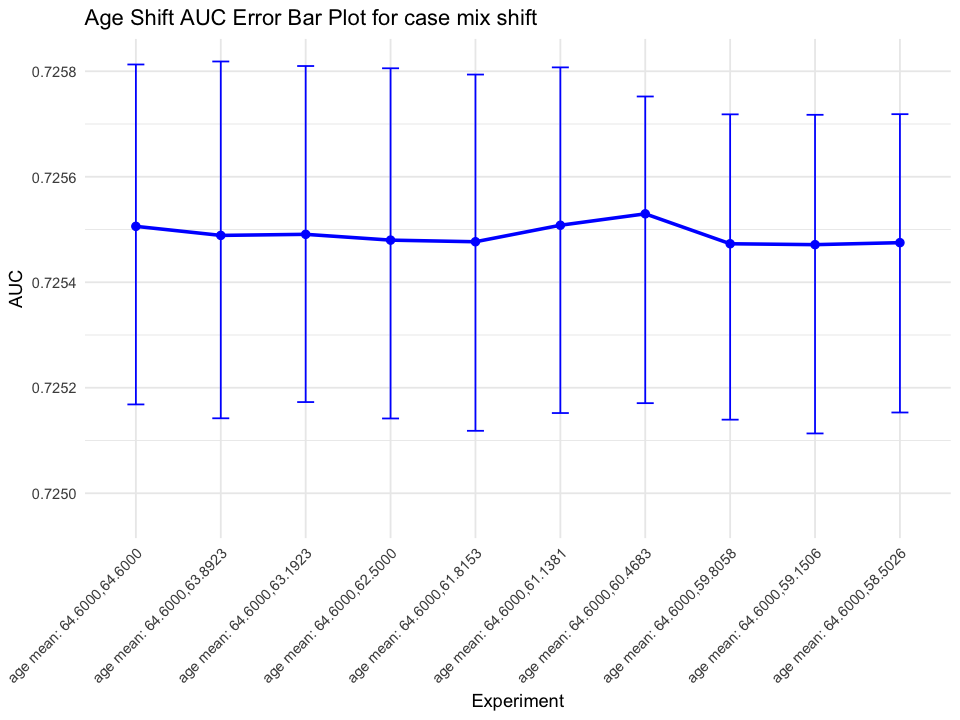

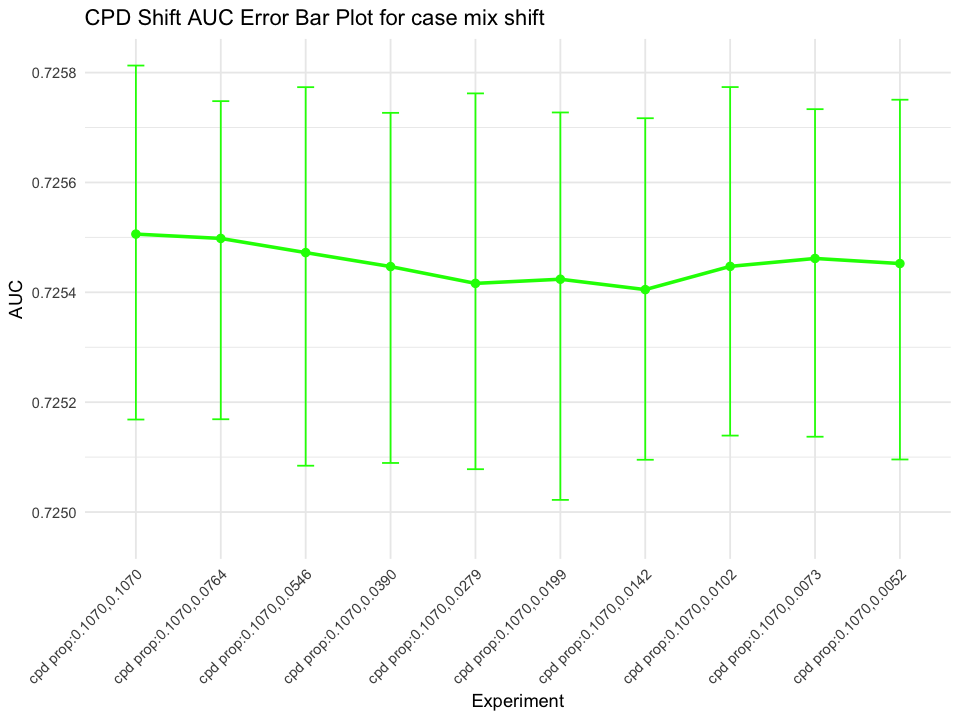

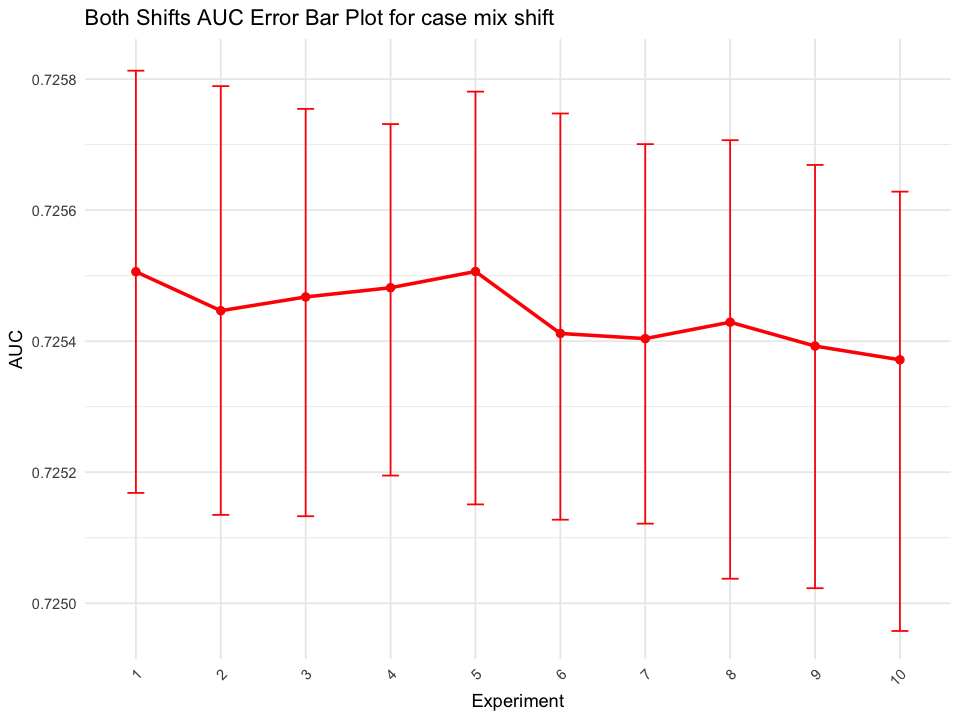

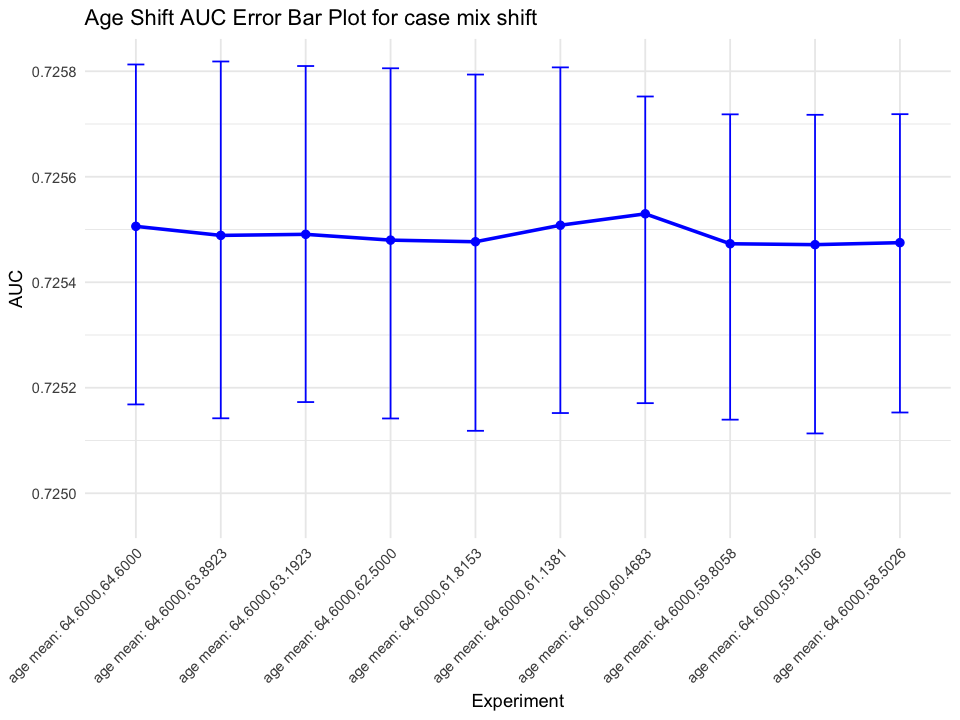

[[1]]

[[2]]

[[3]]


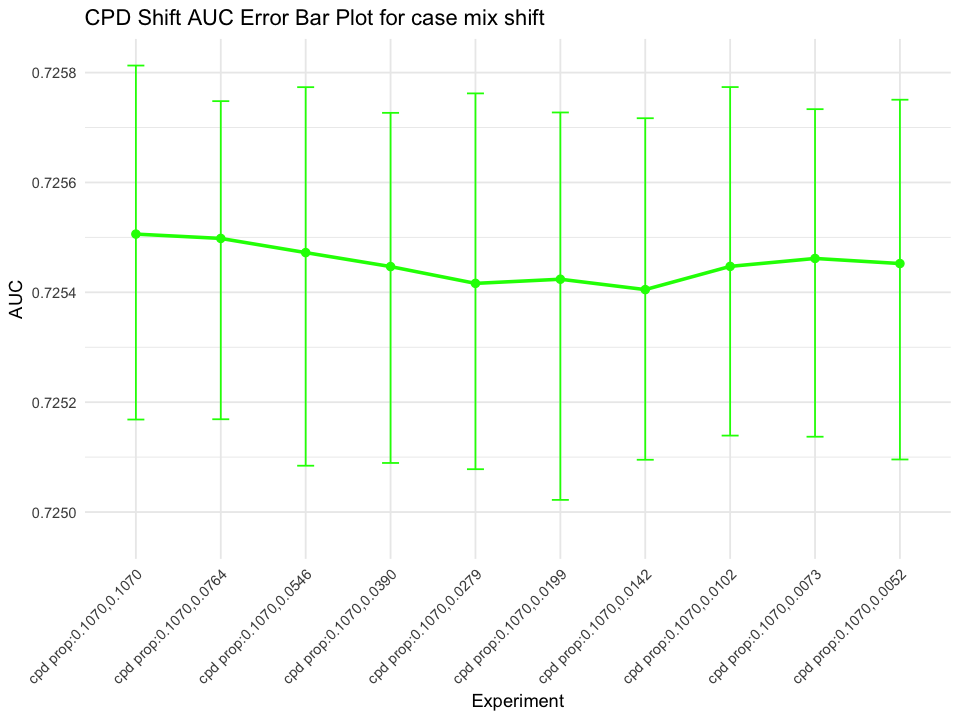

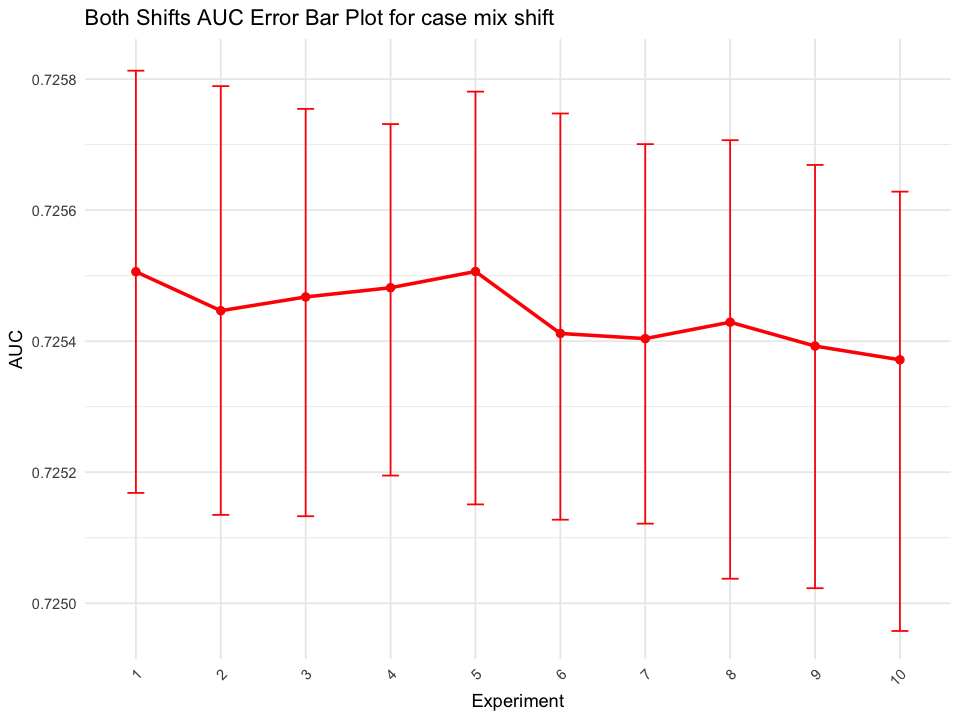

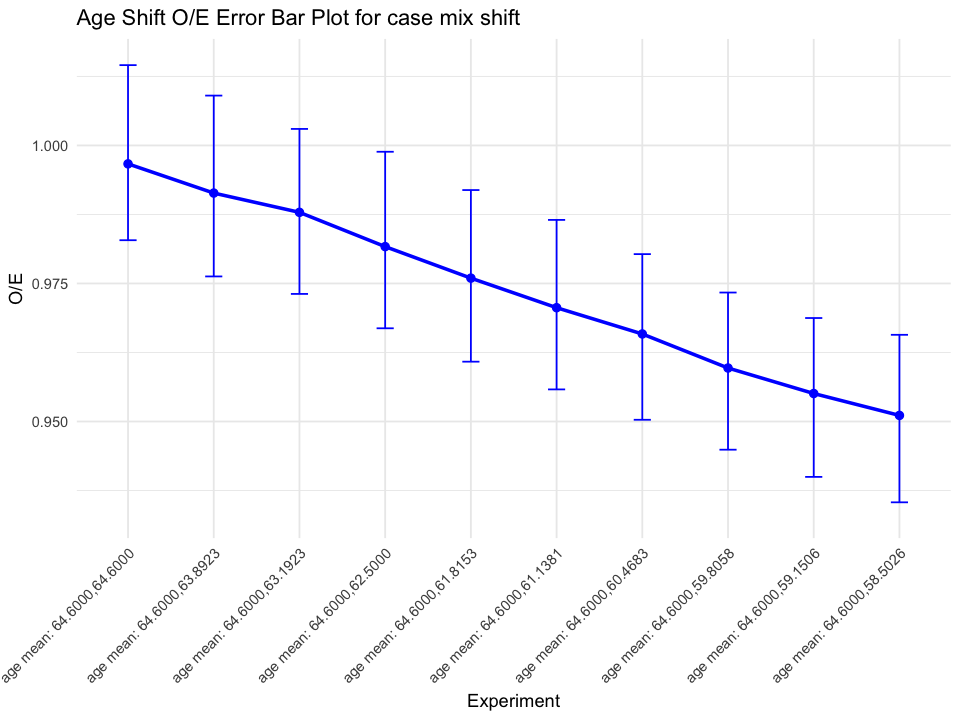

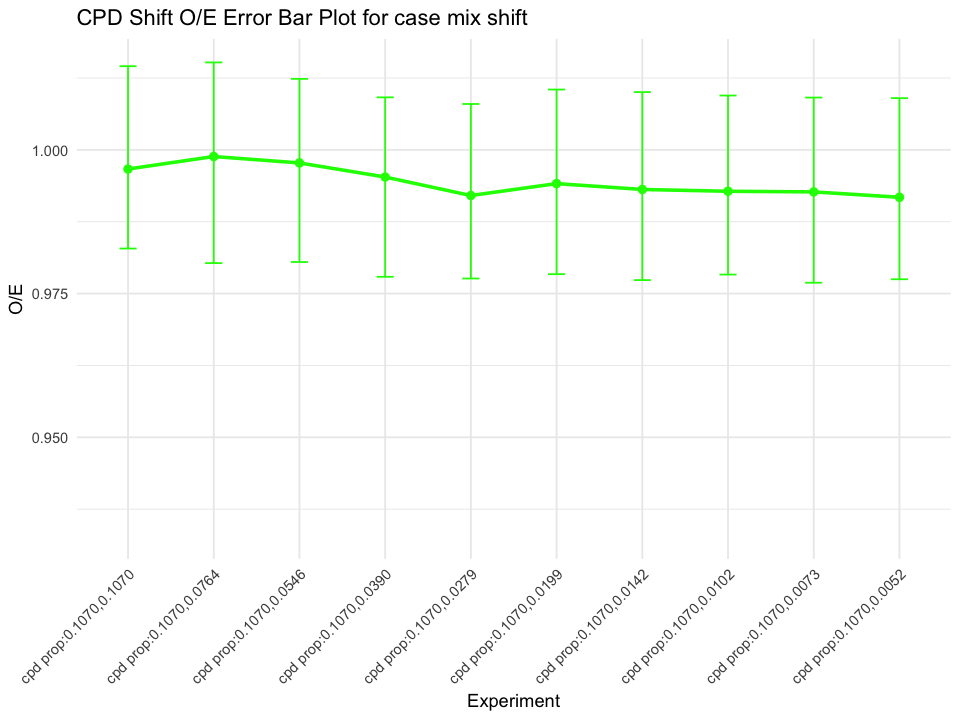

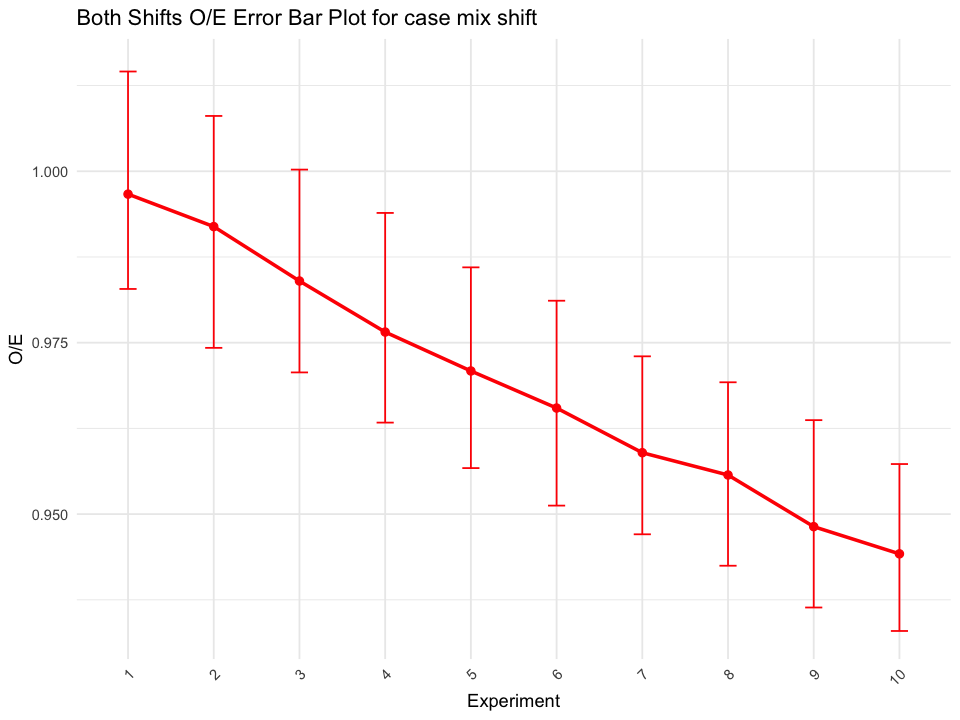

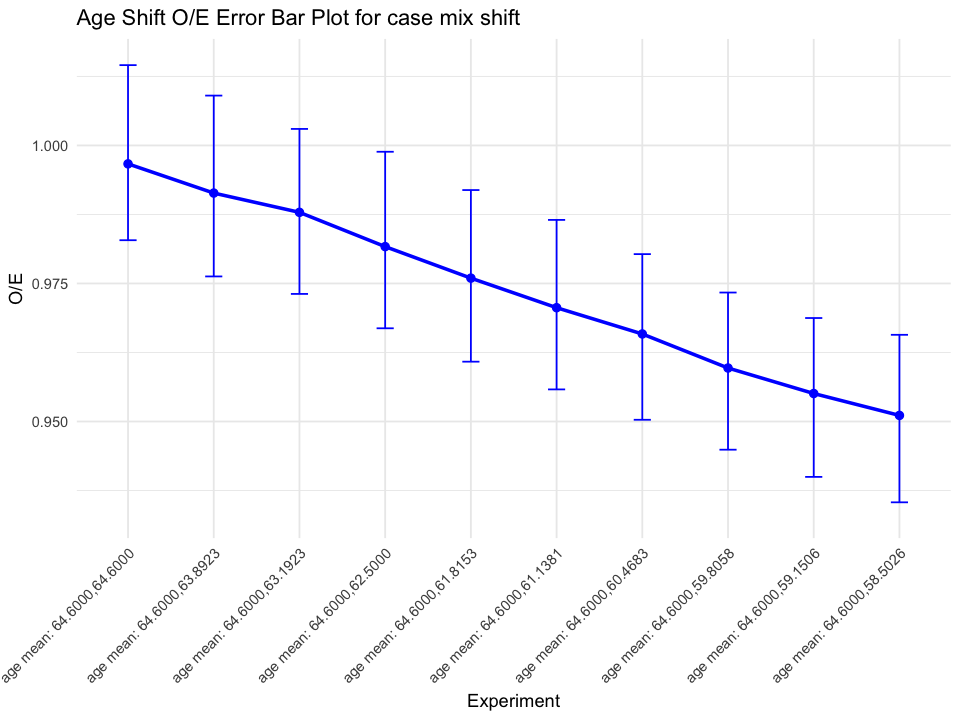

[[1]]

[[2]]

[[3]]


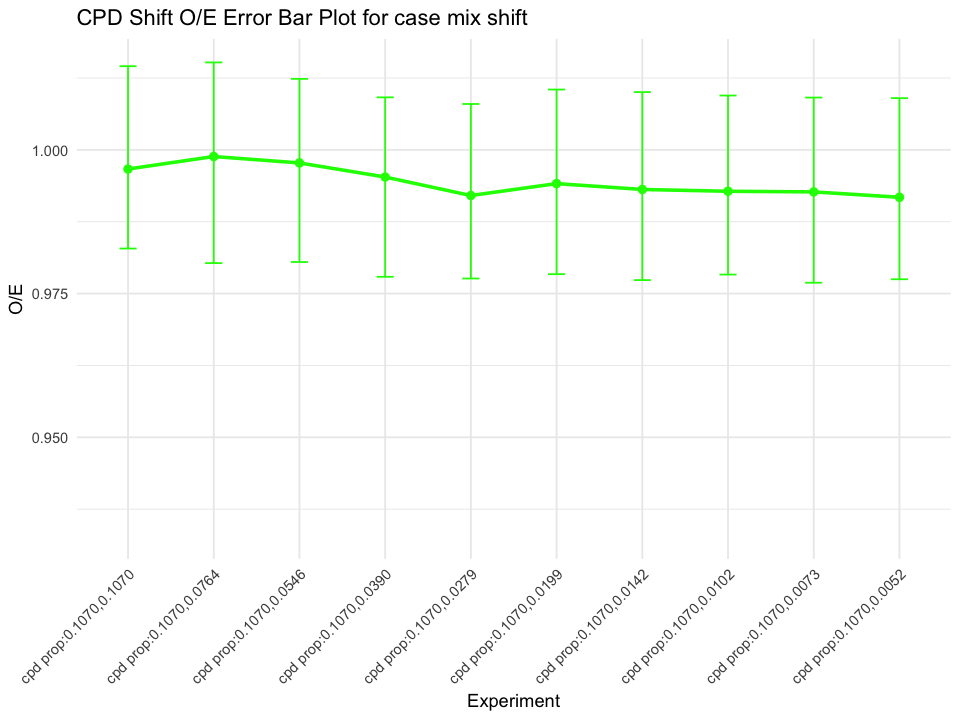

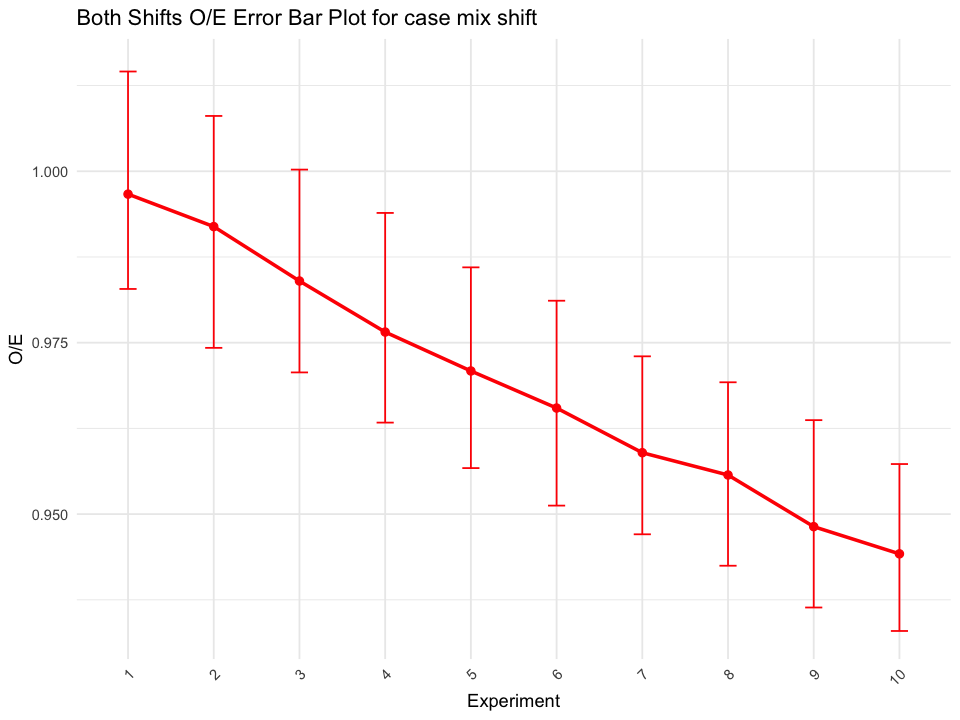

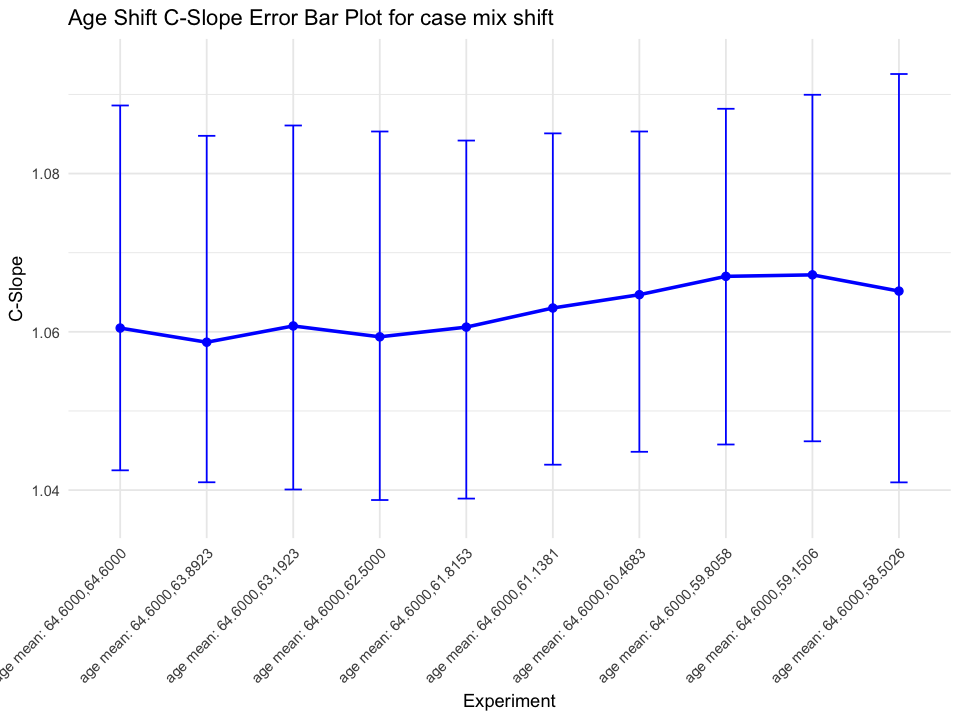

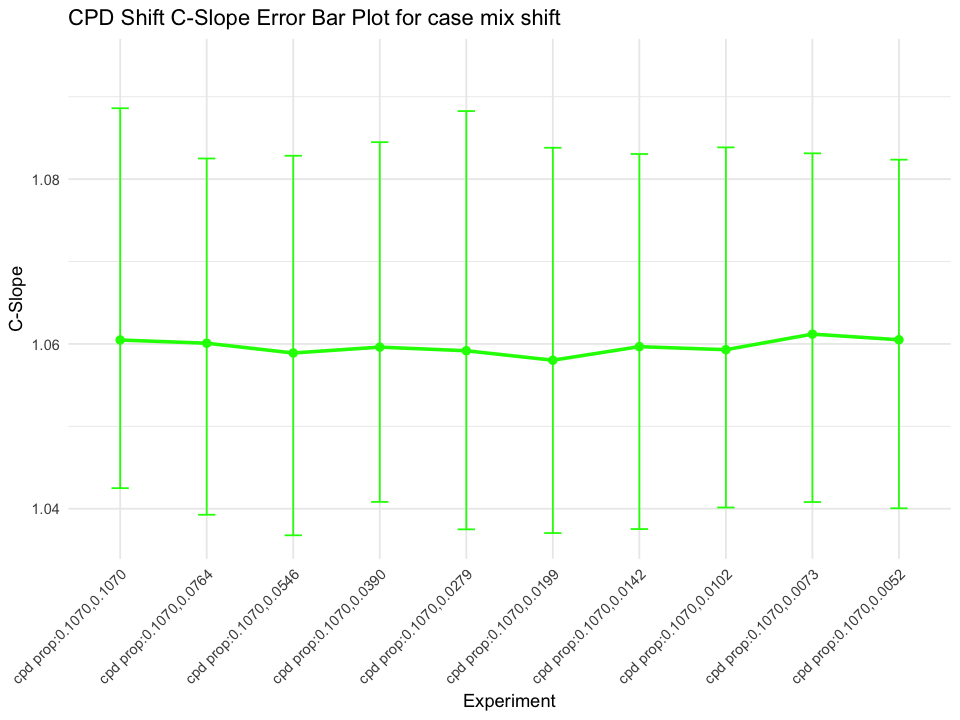

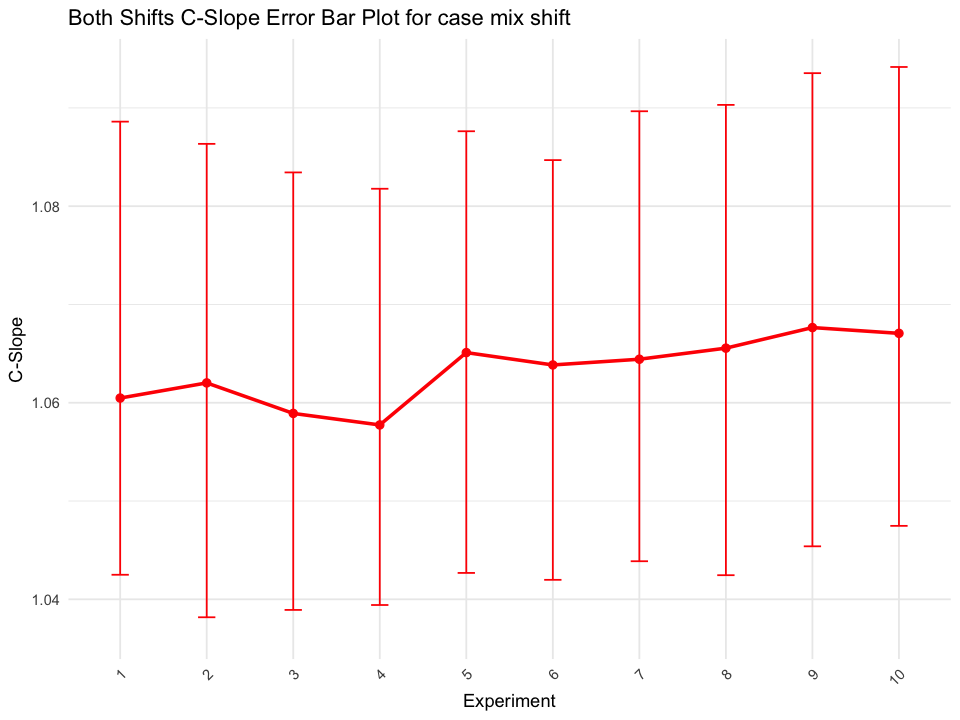

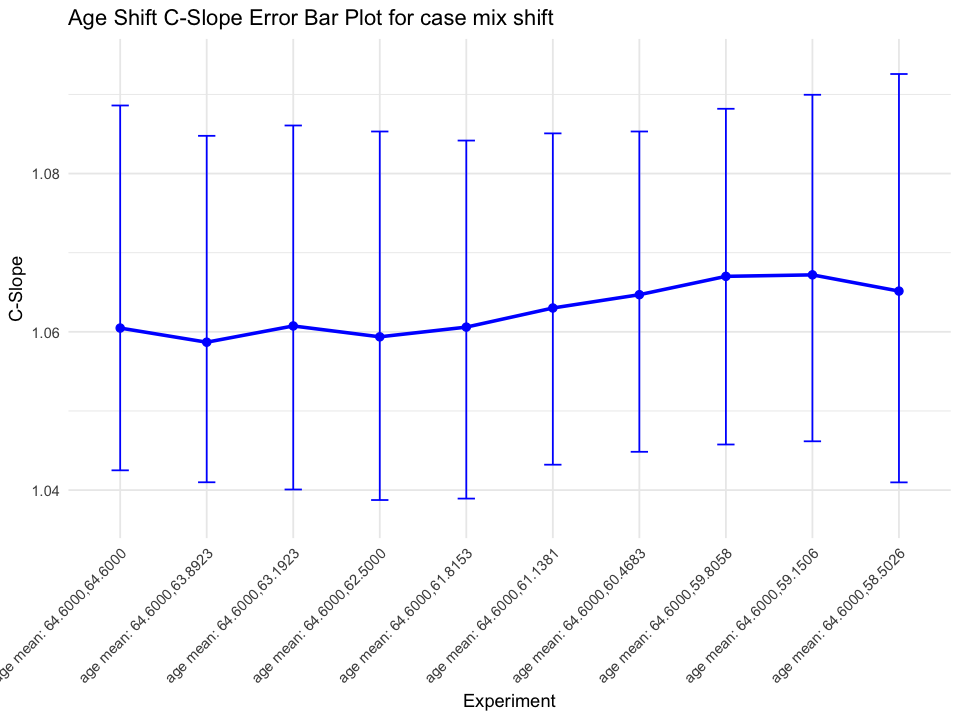

[[1]]

[[2]]

[[3]]


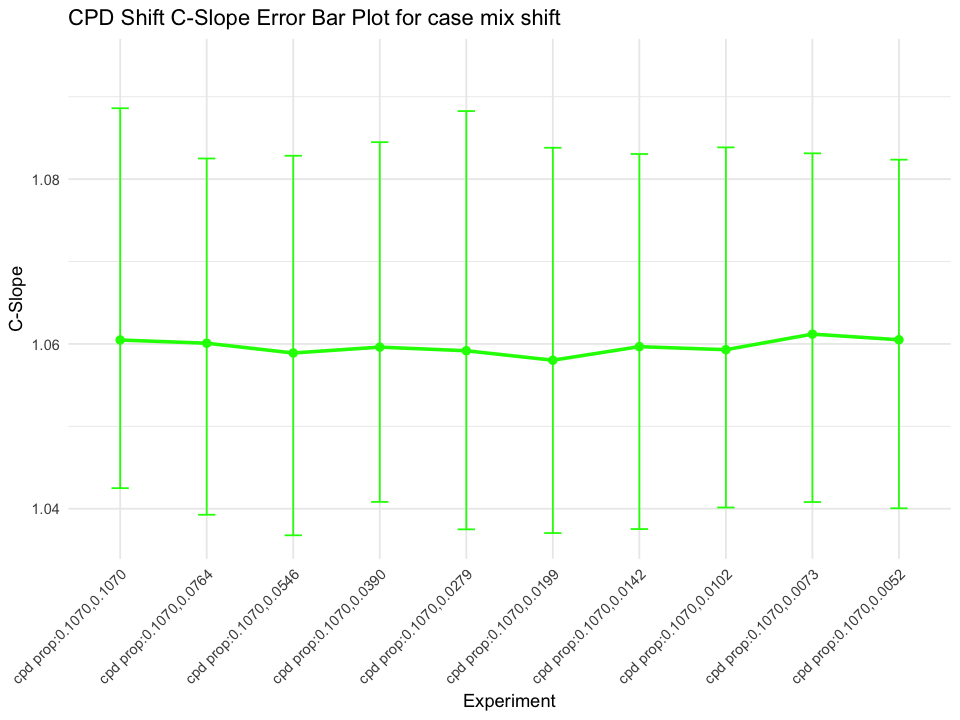

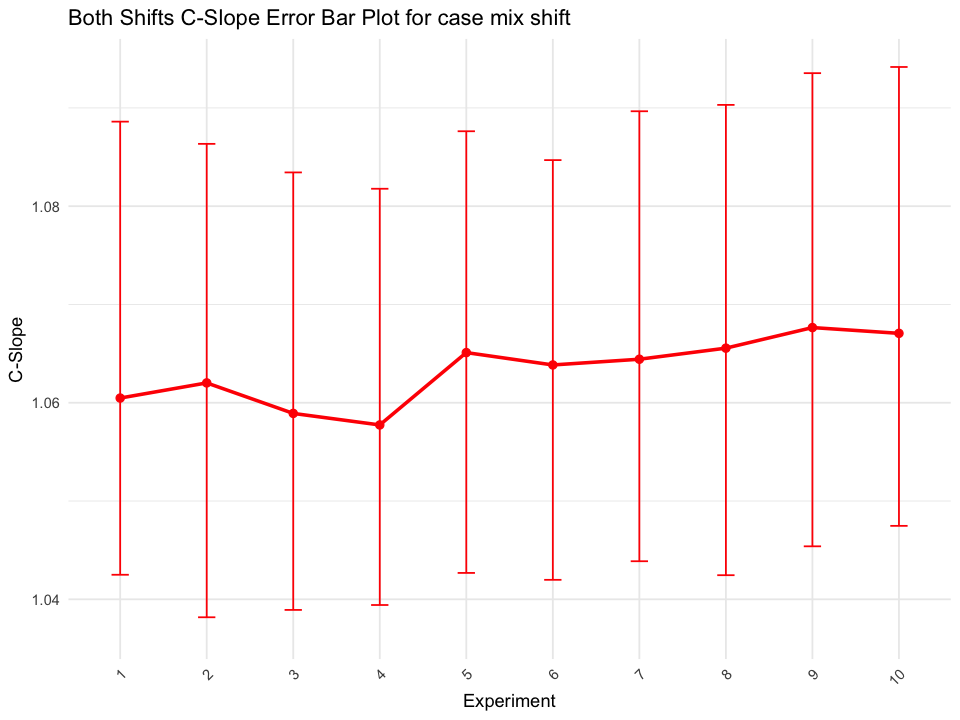

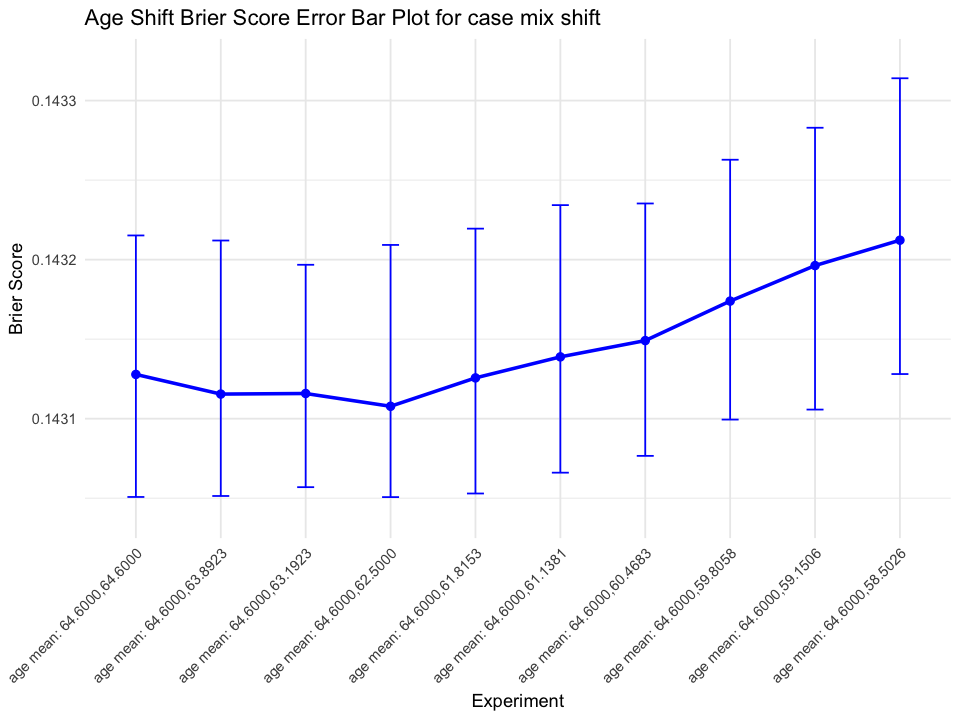

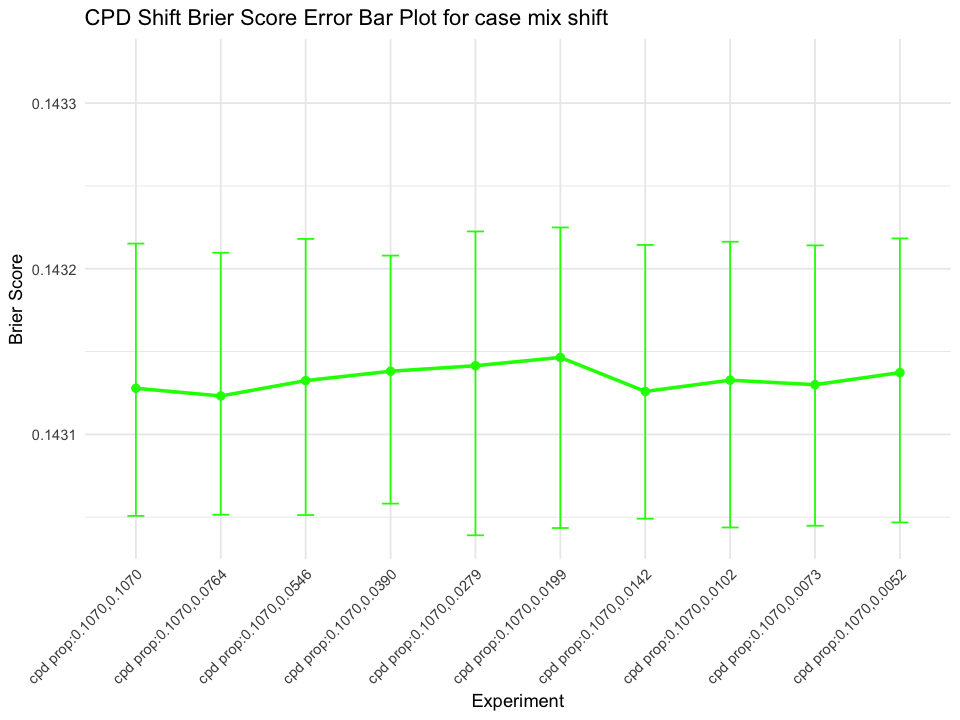

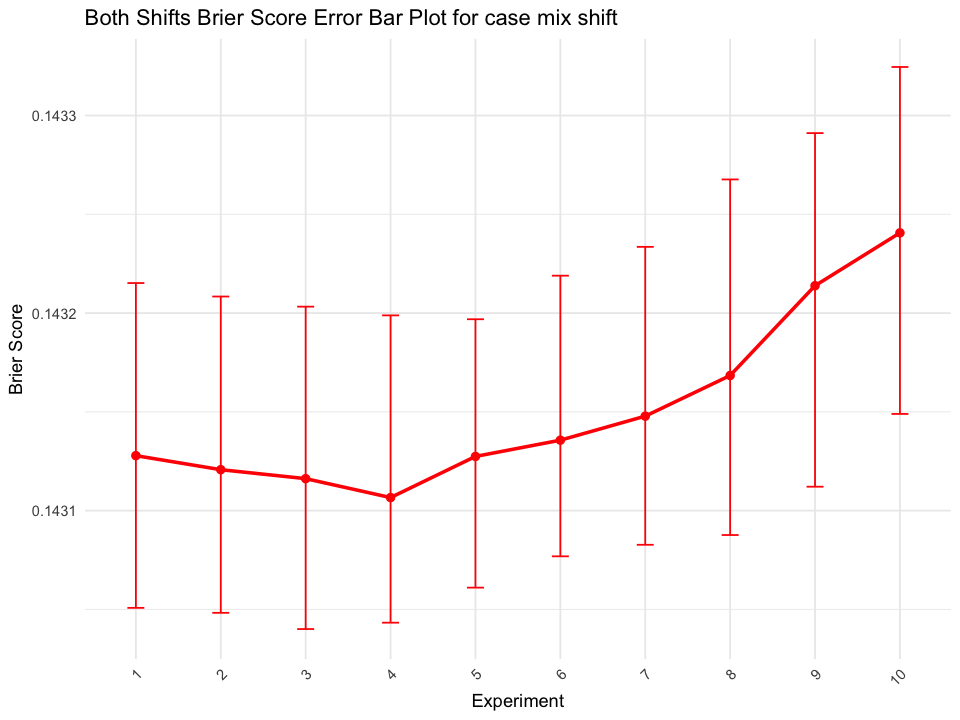

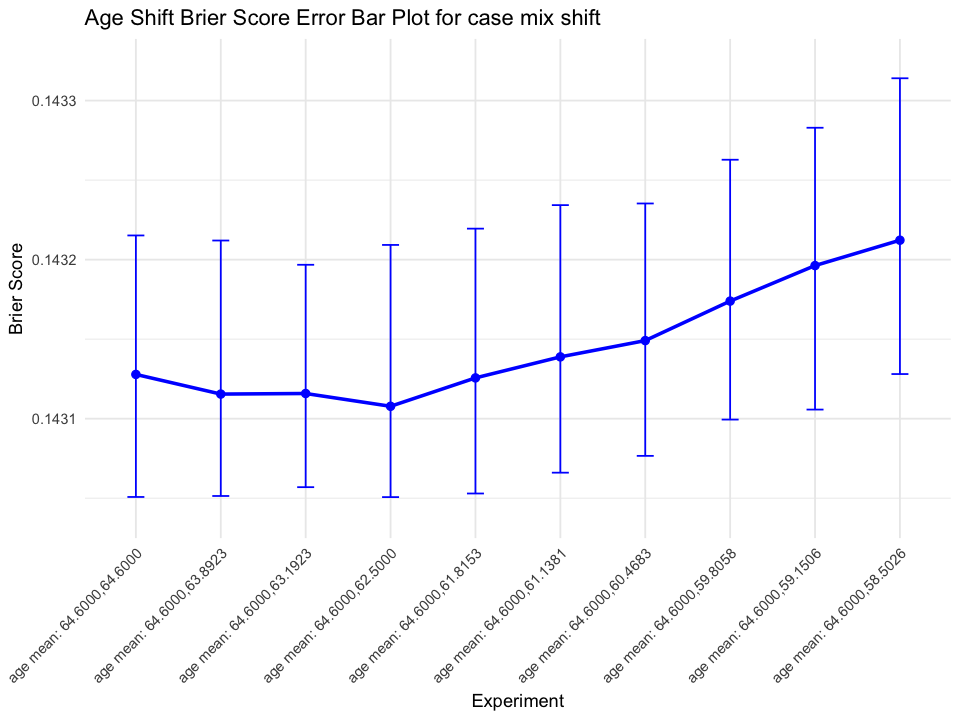

[[1]]

[[2]]

[[3]]


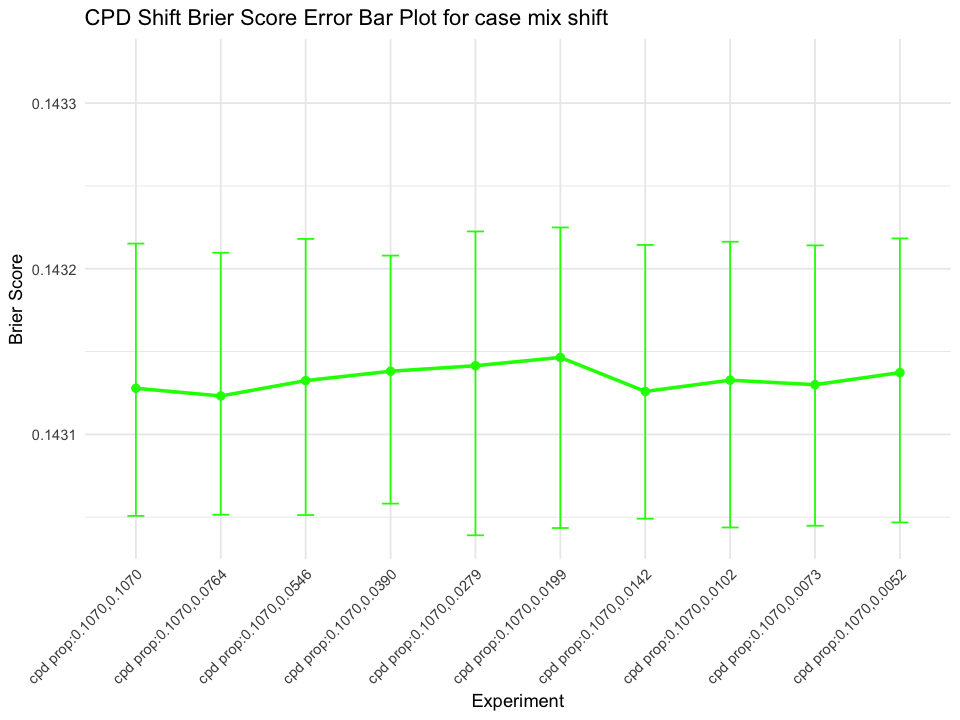

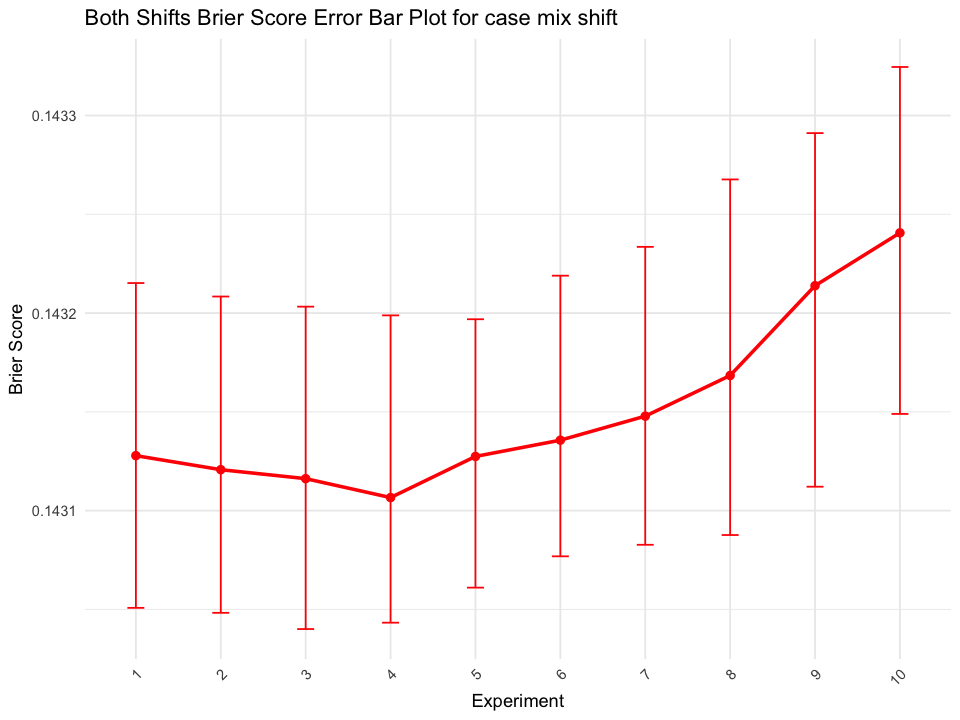

In [24]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr) 

# 设置图像输出宽度
options(repr.plot.width = 8, repr.plot.height = 6)

# 合并数据框并添加标识列
combine_data_frames <- function(df_list, names) {
  df_combined <- map2_df(df_list, names, ~mutate(.x, source = .y))
  return(df_combined)
}

# 定义数据框和相应的名称
data_frames <- list(total_results_covariate_shifted_data_age_2, total_results_covariate_shifted_data_cpd_2, total_results_covariate_shifted_data_both_2)
data_frame_names <- c("Age Shift", "CPD Shift", "Both Shifts")

# 合并所有数据框
combined_data_frame <- combine_data_frames(data_frames, data_frame_names)

# 确保 experiment 列作为因子并按唯一值排序
combined_data_frame$experiment <- factor(combined_data_frame$experiment, levels = unique(combined_data_frame$experiment))

# 创建单独图表的函数
create_single_plot <- function(combined_df, metric_median, metric_25, metric_75, metric_name, y_label, source_name, color) {
  ggplot(combined_df %>% filter(source == source_name), aes(x = experiment, y = !!sym(metric_median))) +
    geom_line(aes(group = source), color = color, size = 1) +
    geom_point(color = color, size = 2) +
    geom_errorbar(aes(ymin = !!sym(metric_25), ymax = !!sym(metric_75)), width = 0.2, color = color) +
    theme_minimal() +
    labs(title = paste(source_name, metric_name, "Error Bar Plot for case mix shift"),
         x = "Experiment", y = y_label) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    ylim(min(combined_df[[metric_25]], na.rm = TRUE), max(combined_df[[metric_75]], na.rm = TRUE))
}

# 定义颜色
colors <- c("Age Shift" = "blue", "CPD Shift" = "green", "Both Shifts" = "red")

# 创建各个性能指标的图表
# 为每个 "source" 创建单独的图表
sources <- c("Age Shift", "CPD Shift", "Both Shifts")

# 分别为 AUC、O/E、C-Slope 和 Brier Score 创建图表
plots_auc <- lapply(sources, function(source) create_single_plot(combined_data_frame, "auc_median", "auc_25", "auc_75", "AUC", "AUC", source, colors[source]))
plots_oe <- lapply(sources, function(source) create_single_plot(combined_data_frame, "o_e_median", "o_e_25", "o_e_75", "O/E", "O/E", source, colors[source]))
plots_cslope <- lapply(sources, function(source) create_single_plot(combined_data_frame, "c_slope_median", "c_slope_25", "c_slope_75", "C-Slope", "C-Slope", source, colors[source]))
plots_brier_score <- lapply(sources, function(source) create_single_plot(combined_data_frame, "brier_score_median", "brier_score_25", "brier_score_75", "Brier Score", "Brier Score", source, colors[source]))

# 打印合并后的图表
# AUC图表
lapply(plots_auc, print)
# O/E图表
lapply(plots_oe, print)
# C-Slope图表
lapply(plots_cslope, print)
# Brier Score图表
lapply(plots_brier_score, print)
